# Blood Glucose Control - EDA

**Name:** [*Junwon Park*]



# Data Cleaning

### Import Data and libraries

There are multiple data sets each corresponding to a person with diabetes. Please load the files into a single data set while retaining the ability to distinguish between the PWD. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df1 = pd.read_csv('../data/gluroo_500030.csv')
df2= pd.read_csv('../data/gluroo_679372.csv')

### Function to edit the date column

In [2]:
# Function to format the date by removing the time zone and ensuring consistency
def format_date(date):
    if isinstance(date, str):  # Ensure it's a string before parsing
        try:
            # Try parsing with microseconds and timezone
            datetime_obj = datetime.strptime(date, '%Y-%m-%d %H:%M:%S.%f%z')
        except ValueError:
            try:
                # If it fails, try parsing without microseconds
                datetime_obj = datetime.strptime(date, '%Y-%m-%d %H:%M:%S%z')
            except ValueError:
                # Handle cases with no timezone info or microseconds
                try:
                    datetime_obj = datetime.strptime(date, '%Y-%m-%d %H:%M:%S.%f')
                except ValueError:
                    datetime_obj = datetime.strptime(date, '%Y-%m-%d %H:%M:%S')
        
        # Return the formatted datetime without timezone, with milliseconds precision
        return datetime_obj.strftime('%y/%m/%d %H:%M:%S.%f')[:-3]
    return date  # If it's not a string, return the original value

Checking if date information is lost if we use the format_date function.

In [3]:
df1['date'].nunique()# looks like date is not unique, no specified id column.

27692

In [4]:
df1['date'].apply(format_date).nunique()

27692

looks like no informations is lost

creating a function to create separate columns for date attributes (to make it easier using groupby)

In [5]:
# Function to split the date into components
def separate_date(df):
    # First, apply the format_date function to the 'date' column to clean it up
    df['date'] = df['date'].apply(format_date)
    
    # Now convert the cleaned 'date' column into datetime format
    df['date'] = pd.to_datetime(df['date'], format='%y/%m/%d %H:%M:%S.%f')
    
    # Extract year, month, day, etc.
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['hour'] = df['date'].dt.hour
    df['minute'] = df['date'].dt.minute
    df['second'] = df['date'].dt.second
    df['seconds_with_micro'] = df['date'].dt.second + df['date'].dt.microsecond / 1_000_000
    
    return df

# Applying the function to the dataframe
df1 = separate_date(df1)


In [6]:
df1 = separate_date(df1.apply(format_date))
df2 = separate_date(df2.apply(format_date))

# Data Description

In [7]:
tmp = df1.groupby(by=['date']).size().reset_index(name='count')
tmp[tmp['count']>1] ## looks like there are overlapping dates 

,date,count
1263,2024-05-05 05:06:55.374,2
2972,2024-05-10 20:26:41.469,3
3026,2024-05-11 00:38:31.900,2
3201,2024-05-11 14:24:43.766,2
3429,2024-05-12 08:24:57.352,2
3620,2024-05-12 23:36:26.143,2
3686,2024-05-13 04:46:16.639,3
3896,2024-05-13 21:02:13.558,2
5064,2024-05-18 00:32:04.575,2
5535,2024-05-19 14:23:38.990,2


In [8]:
# Example case when with rows with same time but differnt info, these columns had different info
df1[df1['date'] == '2024-05-13 04:46:16.639'][['text','food_g']]

,text,food_g
3693,12g Glucose,12.0
3694,9g Glucose,9.0
3695,6g Glucose,6.0


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27737 entries, 0 to 27736
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  27737 non-null  datetime64[ns]
 1   sender_id             1521 non-null   float64       
 2   bgl                   27681 non-null  float64       
 3   bgl_date_millis       1501 non-null   float64       
 4   text                  1516 non-null   object        
 5   template              75 non-null     object        
 6   msg_type              1521 non-null   object        
 7   affects_fob           1521 non-null   object        
 8   affects_iob           1521 non-null   object        
 9   dose_units            647 non-null    float64       
 10  food_g                720 non-null    float64       
 11  food_glycemic_index   719 non-null    float64       
 12  dose_automatic        1521 non-null   object        
 13  fp_bgl          

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32175 entries, 0 to 32174
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  32175 non-null  datetime64[ns]
 1   sender_id             791 non-null    float64       
 2   bgl                   31906 non-null  float64       
 3   bgl_date_millis       767 non-null    float64       
 4   text                  781 non-null    object        
 5   template              41 non-null     object        
 6   msg_type              791 non-null    object        
 7   affects_fob           791 non-null    object        
 8   affects_iob           791 non-null    object        
 9   dose_units            470 non-null    float64       
 10  food_g                285 non-null    float64       
 11  food_glycemic_index   276 non-null    float64       
 12  dose_automatic        791 non-null    object        
 13  fp_bgl          

# Meal Identification

`Objective`: Identify meal events from continuous blood glucose time series data.

`Approach`:

- Time Series Analysis: Detect spikes / rapid changes in blood glucose levels that could indicate meal times.
- Pattern Recognition: Look for patterns typically associated with meals, such as rapid rises followed by gradual decreases.
- Feature Engineering: Create features that could help identify meals, such as the rate of change, peak glucose levels after a spike, and the time interval between changes.
- Visualization: Plot glucose levels around suspected meal times to validate whether these periods coincide with expected meal-induced changes.

## Meal Identification - chosen columns

**Time and Context**: The `date`, `year`, `month`, `day`, and `seconds_with_micro` columns help establish the exact timing of meals, insulin doses, and glucose trends, which are crucial for linking these events to meals.

**Glucose Response**: The `bgl`, `bgl_date_millis`, and `trend` columns provide direct measurements of how glucose levels respond around meal times.

**Insulin and Food Intake**: `dose_units`, `affects_iob`, and `food_g` give insights into the interaction between insulin dosing and carbohydrate intake, both of which are critical for identifying meal impacts.

**Meal and Insulin Events**: The `msg_type` column specifically flags meal announcements (`ANNOUNCE_MEAL`) and insulin doses (`DOSE_INSULIN`), which are direct indicators of meal events.

**Detailed Food Analysis**: `food_glycemic_index` and `food_g` provide a deeper understanding of how the type and amount of food consumed affect glucose levels.

**Manual Logs and Notes**: The `text` column can capture additional details that may not be recorded in structured data, such as corrections, user observations, or adjustments.


In [11]:
# List of columns to filter in df1
columns_to_filter = [
    'date', 'year', 'month', 'day', 'hour', 'minute', 'second', 'seconds_with_micro', 'bgl', 
    'bgl_date_millis', 'text', 'dose_units', 'sender_id', 'msg_type', 
    'affects_fob', 'affects_iob', 'trend', 'dose_automatic', 
    'food_glycemic_index', 'food_g'
]

# Filtering the DataFrame to only include the specified columns
df1_MI = df1[columns_to_filter]
df2_MI = df2[columns_to_filter]

In [12]:
# Create visualizations showing glucose levels with suspected meal events highlighted.
# Use descriptive statistics to characterize glucose levels before, during,st and after meals.

In [13]:
df1_MI[df1_MI['date']=='2024-05-13 04:46:16.639']

,date,year,month,day,hour,minute,second,seconds_with_micro,bgl,bgl_date_millis,text,dose_units,sender_id,msg_type,affects_fob,affects_iob,trend,dose_automatic,food_glycemic_index,food_g
3693,2024-05-13 04:46:16.639,2024,5,13,4,46,16,16.639,72.0,1.715594e+12,12g Glucose,NaN,1057.0,INTERVENTION_SNACK,True,False,NaN,False,1.0,12.0
3694,2024-05-13 04:46:16.639,2024,5,13,4,46,16,16.639,72.0,1.715594e+12,9g Glucose,NaN,1057.0,INTERVENTION_SNACK,True,False,NaN,False,1.0,9.0
3695,2024-05-13 04:46:16.639,2024,5,13,4,46,16,16.639,72.0,1.715594e+12,6g Glucose,NaN,1057.0,INTERVENTION_SNACK,True,False,NaN,False,1.0,6.0


Question: Why are there multiple rows with same date but different `food_g` and `text` column? Is this because multiple food was logged at the same time?
How should we handle this situation?



In [14]:
df1_MI.describe()

,date,year,month,day,hour,minute,second,seconds_with_micro,bgl,bgl_date_millis,dose_units,sender_id,food_glycemic_index,food_g
count,27737,27737.0,27737.000000,27737.000000,27737.000000,27737.000000,27737.000000,27737.000000,27681.000000,1.501000e+03,647.000000,1521.000000,719.000000,720.000000
mean,2024-06-16 03:32:17.419502336,2024.0,6.003713,15.865667,11.651332,28.815697,26.368605,26.511329,111.946172,1.718641e+12,8.009274,1010.542406,0.610570,22.793056
min,2024-05-01 00:00:27.029000,2024.0,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,39.000000,1.714575e+12,0.000000,-1.000000,0.500000,3.000000
25%,2024-05-24 04:20:50,2024.0,5.000000,8.000000,6.000000,14.000000,11.000000,11.000000,89.000000,1.716669e+12,3.000000,1057.000000,0.500000,9.000000
50%,2024-06-16 06:06:57,2024.0,6.000000,16.000000,12.000000,29.000000,26.000000,26.000000,108.000000,1.718630e+12,6.000000,1057.000000,0.500000,15.000000
75%,2024-07-09 05:03:03,2024.0,7.000000,24.000000,18.000000,44.000000,40.000000,40.000000,130.000000,1.720710e+12,9.000000,1057.000000,0.500000,35.000000
max,2024-07-31 23:55:41.451000,2024.0,7.000000,31.000000,23.000000,59.000000,59.000000,59.985000,252.000000,1.722482e+12,26.000000,1102.000000,1.000000,100.000000
std,NaN,0.0,0.821338,8.865896,6.889469,17.292988,16.932738,16.912297,31.186758,2.305900e+09,7.221179,217.082390,0.207652,19.088847


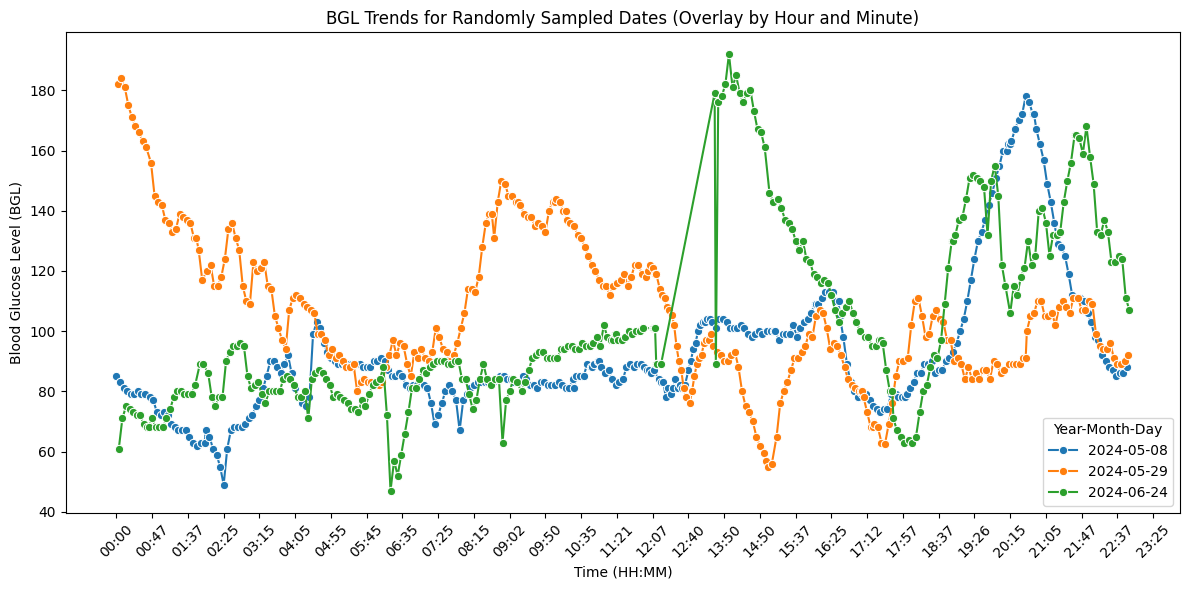

In [15]:
# Get unique combinations of year, month, and day
unique_dates = df1_MI[['year', 'month', 'day']].drop_duplicates()

# Randomly sample 2 unique date combinations
random_dates = unique_dates.sample(n=3)

# Select all rows that belong to the sampled dates
df_random_samples = df1_MI.merge(random_dates, on=['year', 'month', 'day'])

# First, ensure that 'hour' and 'minute' columns are available
# Create a new column for the formatted time as 'hour:min' to ensure time alignment by hour and minute only
df_random_samples['time_formatted'] = df_random_samples.apply(
    lambda row: f"{int(row['hour']):02d}:{int(row['minute']):02d}",
    axis=1
)

# Create a new column combining year, month, and day for the hue/legend
df_random_samples['date_label'] = df_random_samples.apply(
    lambda row: f"{int(row['year'])}-{int(row['month']):02d}-{int(row['day']):02d}",
    axis=1
)

# Sort the data by time to ensure proper plotting
df_random_samples = df_random_samples.sort_values(by=['hour', 'minute'])

# Set up the figure
plt.figure(figsize=(12, 6))

# Plot the data with date_label as hue to distinguish lines by date
sns.lineplot(data=df_random_samples, x='time_formatted', y='bgl', hue='date_label', marker='o')

# Reduce the number of ticks shown on the x-axis (e.g., every 30 minutes or as needed)
x_ticks = np.arange(0, len(df_random_samples['time_formatted']), step=30)  # Adjust 'step' to control density
plt.xticks(ticks=x_ticks, labels=df_random_samples['time_formatted'].iloc[x_ticks], rotation=45)

# Title and labels
plt.title('BGL Trends for Randomly Sampled Dates (Overlay by Hour and Minute)')
plt.xlabel('Time (HH:MM)')
plt.ylabel('Blood Glucose Level (BGL)')
plt.legend(title='Year-Month-Day')
plt.tight_layout()
plt.show()



The graph above plots 3 random days from the user and plots the `bgl` level of the user at that time. 

The purpose of this graph is to see if there is a common trend in `bgl` spikes throughout different times of day.

1.) Lets calculate BGL Rate of Change

In [16]:
# Ensure your data is sorted by time within each day
df1_MI = df1_MI.sort_values(by=['year', 'month', 'day', 'hour', 'minute', 'second', 'seconds_with_micro'])

# Calculate the difference in BGL between consecutive measurements
df1_MI['bgl_diff'] = df1_MI['bgl'].diff()

# Optionally, calculate the rate of change per time unit (if time intervals are uneven)
df1_MI['time_diff'] = df1_MI['seconds_with_micro'].diff() + df1_MI['minute'].diff() * 60 + df1_MI['hour'].diff() * 3600
df1_MI['bgl_rate_of_change'] = df1_MI['bgl_diff'] / df1_MI['time_diff']

2.) Detect Peaksin BGL

Detect local peaks in BGL values, which typically correspond to a rise after meals. This can be done using a rolling window or other peak-detection methods.

In [17]:
# Using a rolling window to smooth out BGL and identify meal peaks
df1_MI['bgl_smooth'] = df1_MI['bgl'].rolling(window=5).mean()  # Adjust window size if necessary

In [18]:
from scipy.signal import find_peaks

# Detect peaks in smoothed BGL data
peaks, _ = find_peaks(df1_MI['bgl_smooth'], prominence=5)  # Adjust prominence based on your data

# Mark peaks in the dataset
df1_MI['meal_detected'] = 0
df1_MI.loc[peaks, 'meal_detected'] = 1

3.) Correlate BGL Spikes with Food Intake:
If you have a `food_g` column (representing the amount of food consumed), you can correlate the detected BGL spikes with food intake.

In [19]:
# Check for correlation between BGL spikes and food intake
df1_MI[['bgl', 'food_g']].corr()


,bgl,food_g
bgl,1.000000,0.320257
food_g,0.320257,1.000000


4.) Investigate Time of Day:
Meals generally follow certain patterns (e.g., breakfast, lunch, dinner). You can group the data by time of day to analyze when BGL spikes commonly occur.

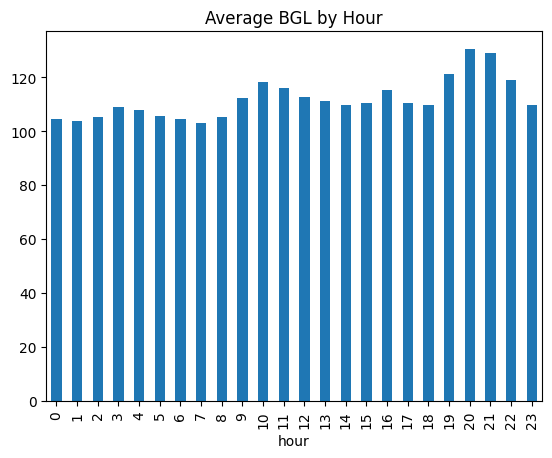

In [20]:
# Group by hour of the day to analyze common meal times
df1_MI['hour'] = df1_MI['hour']  # Ensure hour column is present
hourly_meal_patterns = df1_MI.groupby('hour')['bgl'].mean()

# Plot the average BGL by hour
hourly_meal_patterns.plot(kind='bar', title='Average BGL by Hour')
plt.show()


5.) Cluster Analysis for Meal Detection:
If you want a more advanced approach, you can use clustering techniques like KMeans to group BGL patterns that correspond to meals.

In [3]:
from sklearn.cluster import KMeans

# Select features that may influence meal patterns
features = df1_MI[['bgl', 'bgl_diff', 'hour', 'food_g', 'dose_units']].fillna(0)

# Fit a KMeans model to cluster meal times
kmeans = KMeans(n_clusters=3, random_state=42)
df1_MI['meal_cluster'] = kmeans.fit_predict(features)

# Analyze clusters to understand meal times

ModuleNotFoundError: No module named 'sklearn'

# Mean Scoring

`Objective:` Assess the average glucose levels over time to identify periods of good or poor control.

`Approach:`

- Calculate Mean Glucose Levels: Compute the mean glucose levels over specific time windows (e.g., hourly, daily) to get a sense of average control.
- Categorize Control Quality: Define ranges for good, moderate, and poor control (e.g., using thresholds like 70-180 mg/dL).
- Temporal Analysis: Analyze how mean glucose scores change over time to identify trends in control quality.
- Comparisons: Compare mean glucose levels across different contexts (e.g., weekdays vs. weekends, before vs. after interventions).

In [ ]:
# Visualize mean glucose scores with thresholds marked to highlight periods of good or poor control.
# Use bar plots or line charts to track changes in mean glucose levels over time.

# Prandial Interventions and Counterfactuals

`Objective:` Explore how interventions around meals (e.g., insulin doses) impact glucose levels and simulate potential outcomes of alternative strategies.

`Approach:`

- Identify Prandial Interventions: Locate points in the data where insulin or other interventions were administered around meal times.
- Analyze Intervention Effectiveness: Assess the impact of these interventions by comparing glucose levels before and after the intervention.
- Counterfactual Analysis: Hypothesize what might have happened if a different intervention had been used (e.g., delayed insulin administration).
- Visualization: Use plots to show glucose trajectories with and without interventions, and overlay counterfactual scenarios.

In [ ]:
# Create side-by-side plots showing actual vs. hypothetical glucose responses to different prandial interventions.
# Highlight instances where the intervention timing or dosage could be optimized.

# Blood Glucose Controller

`Objective:` Understand how well blood glucose is being maintained within target ranges and identify areas for potential improvement.

`Approach:`

- Control Analysis: Identify periods where glucose levels are within, above, or below the target range (70-180 mg/dL).
- Glucose Variability Assessment: Evaluate metrics such as standard deviation, coefficient of variation, or time-in-range to assess overall control stability.
- Predictive Modeling: Explore simple models that can predict future glucose levels based on current and past data.
- Visualization: Use control charts or time-in-range plots to show overall control performance.

In [ ]:
# Generate time-in-range plots that show how often glucose levels are within the target range.
# Use scatter plots to show variability and trends that might indicate a need for controller adjustments.

### Two Data Visualizations

Create at least two visualizations that are of interest to you. They can be things that would be useful information for a PWD to know, or they could be useful for informing future modeling work. If you aren't sure what to visualize try recreating common diabetes data visualizations that you can find on the internet. 

### Ask a question(s) about the data and/or diabetes!
When creating the visualizations you probably had some questions about managing T1D. Ask some questions that might interest you and our diabetes experts will do their best to answer them for you! *Consider this an AMAA about diabetes.* 

1. [Question 1]
2. [Question 2]

### Final Task

Thanks for showing interest in our project! We plan to incorporate the best/most interesting visualizations into a substack post in the future. 

Please remember to create a pull request with your updated template, don't forget to rename the file to something that we can identify you with, e.g: `eda_[your_name].ipynb`